# Visualising the Bughunt Corpus
This notebook follows the process of taking the frequency distribution of the different bug words and creating a visualisation of how frequency changes over time.

NB: This notebook does not actually create any of the figures in the folder `../output/figs/bughunt` such as `insect-stem-freq-unigram.png` -- that is done by the script `insect-freq-unigram.py`. The examples here are a walk-through and explanation of the code.

We will use the code library called Natural Language Toolkit (NLTK) to provide a lot of text mining functions that are already written. More information on this can be found here: http://www.nltk.org/. We will also use two popular libraries: Pandas for data manipulation (https://pandas.pydata.org/) and matplotlib (https://matplotlib.org/) to create the graph.

## Preparing the Data
### Loading the CSV File

After text processing the corpus, the results were saved as a CSV file. First we have to load the data from this file into what is called a 'dataframe', which is much like a table.

In [3]:
from pathlib import Path
data_path = Path('..', 'output', 'csv', 'bughunt', 'insect-stem-freq-unigram.csv')

import pandas as pd
df = pd.read_csv(data_path, index_col='year')
df

,ant,bee,beetl,butterfli,cockroach,cricket,dragonfli,earwig,flea,fli,gnat,grasshopp,ladybird,lous,mosquito,moth,spider,termit,wasp
year,,,,,,,,,,,,,,,,,,,
1800,0.000000,0.001931,0.001931,0.005792,0.000000,0.000000,0.000965,0.000000,0.000000,0.000965,0.001931,0.004826,0.000000,0.000000,0.000000,0.001931,0.001931,0.000000,0.000965
1810,0.000226,0.006993,0.000090,0.009114,0.000000,0.000226,0.000000,0.000000,0.000135,0.002752,0.000045,0.000045,0.000000,0.000135,0.000000,0.000271,0.000090,0.000000,0.000226
1820,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1830,0.002341,0.003771,0.000828,0.001310,0.000008,0.000083,0.000120,0.000083,0.000166,0.003771,0.000557,0.000090,0.000105,0.000083,0.000008,0.002506,0.002258,0.000120,0.001377
1840,0.001522,0.002746,0.000924,0.001767,0.000036,0.000816,0.000181,0.000145,0.000145,0.002311,0.000589,0.000190,0.000100,0.000036,0.000091,0.001169,0.001504,0.000127,0.000825
1850,0.001554,0.002751,0.000474,0.000856,0.000033,0.000133,0.000208,0.000058,0.000108,0.002551,0.000199,0.000125,0.000058,0.000000,0.000017,0.000765,0.000981,0.000017,0.000499
1860,0.000695,0.000206,0.000000,0.000788,0.000000,0.000019,0.000000,0.000000,0.000000,0.000582,0.000000,0.000019,0.000000,0.000000,0.000000,0.000000,0.000732,0.000038,0.000075
1870,0.003957,0.002828,0.000683,0.002132,0.000028,0.000042,0.000070,0.000223,0.000098,0.002522,0.000098,0.000153,0.000153,0.000014,0.000000,0.001115,0.001310,0.000223,0.000474
1880,0.001335,0.000941,0.001061,0.000470,0.000070,0.000073,0.000051,0.000013,0.000041,0.001370,0.000089,0.000184,0.000022,0.000076,0.000137,0.000785,0.000416,0.000089,0.000375


### Loading the Bug Word list
We also need the bug word list again from the text file.

In [4]:
from pathlib import Path
stemlist = Path('..', 'wordlists', 'insect-wordstems.txt')

from nltk.corpus.reader import WordListCorpusReader
insect_words = WordListCorpusReader('.', [stemlist])
insect_words.words()

['ant',
 'bee',
 'beetl',
 'butterfli',
 'cockroach',
 'cricket',
 'dragonfli',
 'earwig',
 'flea',
 'fli',
 'gnat',
 'grasshopp',
 'ladybird',
 'lous',
 'mosquito',
 'moth',
 'spider',
 'termit',
 'wasp']

## Plotting
Now that we have the data ready, we can experiment with some plotting!

First, let's try the whole dataset.

Text(0.5, 0.98, "Frequency of Bugs in Children's Literature by Decade 1800-1920")

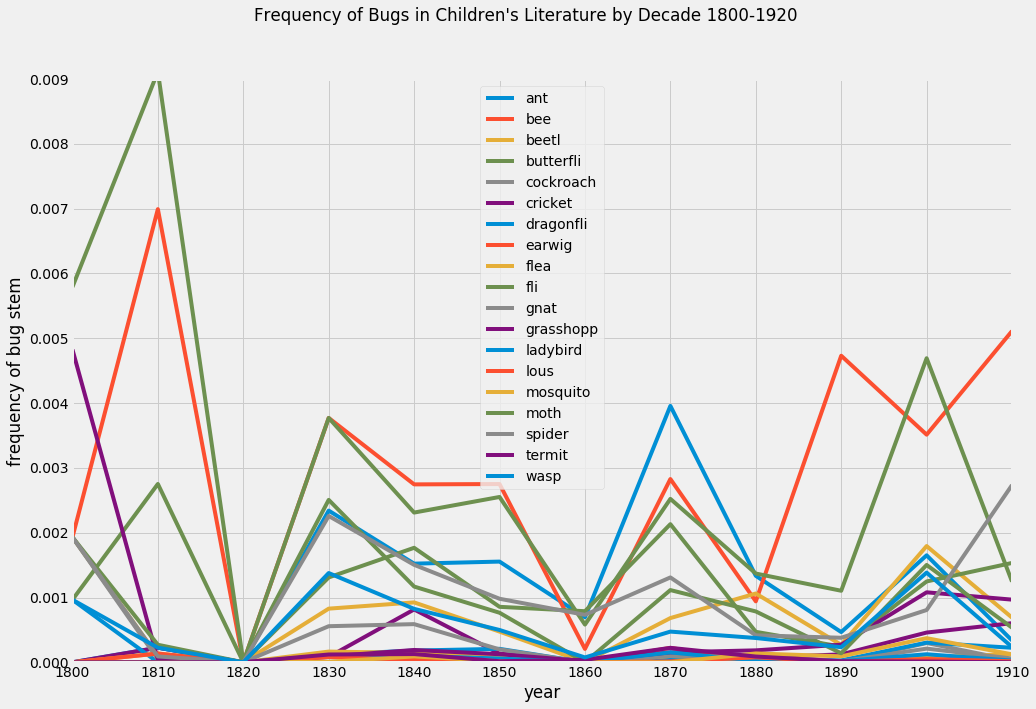

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [15, 10]
plt.style.use('fivethirtyeight')

ax = plt.gca()
for insect in insect_words.words():
    df.plot(kind='line', y=insect, ax=ax)

plt.axis([1800, 1910, 0, 0.009])
plt.xticks(np.arange(1800, 1920, 10))
plt.ylabel('frequency of bug stem')
plt.suptitle('Frequency of Bugs in Children\'s Literature by Decade 1800-1920')